In [1]:
import pandas as pd
import seaborn as sns

In [3]:
mpg = sns.load_dataset('mpg')
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [6]:
mpg['horsepower'].loc[32] = 75
mpg['horsepower'].loc[126] = 105
mpg['horsepower'].loc[330] = 51
mpg['horsepower'].loc[336] = 120
mpg['horsepower'].loc[354] = 73
mpg['horsepower'].loc[374] = 82

/tmp/ipykernel_415334/3019380189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['horsepower'].loc[32] = 75
/tmp/ipykernel_415334/3019380189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['horsepower'].loc[126] = 105
/tmp/ipykernel_415334/3019380189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['horsepower'].loc[330] = 51
/tmp/ipykernel_415334/3019380189.py:4: SettingWithCopyWarning: 
A value is trying to be 

In [7]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [8]:
dummies = pd.get_dummies(mpg['origin'])
dummies.head()

,europe,japan,usa
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [9]:
data = pd.concat([mpg, dummies], axis=1)
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,europe,japan,usa
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,False,False,True
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,False,False,True


In [10]:
data.drop(['origin', 'name'], axis=1, inplace=True)
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
393,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720,19.4,82,False,False,True


In [12]:
data.columns[1:]

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'europe', 'japan', 'usa'],
      dtype='object')

In [15]:
query_data = data[data.columns[1:]]
query_data.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
393,4,140.0,86.0,2790,15.6,82,False,False,True
394,4,97.0,52.0,2130,24.6,82,True,False,False
395,4,135.0,84.0,2295,11.6,82,False,False,True
396,4,120.0,79.0,2625,18.6,82,False,False,True
397,4,119.0,82.0,2720,19.4,82,False,False,True


In [16]:
answer_data = data['mpg']
answer_data.tail()

393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
train_queries, test_queries, train_answers, test_answers = \
train_test_split(query_data, answer_data, test_size=0.33, random_state=42)

In [26]:
test_queries

,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
198,4,91.0,53.0,1795,17.4,76,False,True,False
396,4,120.0,79.0,2625,18.6,82,False,False,True
33,6,232.0,100.0,2634,13.0,71,False,False,True
208,8,318.0,150.0,3940,13.2,76,False,False,True
93,8,318.0,150.0,4237,14.5,73,False,False,True
...,...,...,...,...,...,...,...,...,...
392,4,151.0,90.0,2950,17.3,82,False,False,True
379,4,98.0,70.0,2125,17.3,82,False,False,True
358,4,120.0,74.0,2635,18.3,81,False,True,False
310,4,89.0,60.0,1968,18.8,80,False,True,False


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linreg = LinearRegression().fit(train_queries, train_answers)
print(linreg)

LinearRegression()


In [29]:
predicted_mpg = linreg.predict(test_queries)
predicted_mpg

array([32.5807764 , 29.11531912, 20.82468337, 16.81042998, 12.53671407,
       26.89224642, 27.46096913,  9.71898846, 17.0760993 , 21.5306433 ,
       12.55239646, 35.97375981, 24.45309969, 13.64179325, 23.33981127,
        6.42582008, 29.07341977, 25.16152699, 16.28333751, 36.13277466,
       24.85161985, 18.54208742, 28.42495262, 28.10143028, 14.80888168,
       35.98685651, 26.59945344, 24.37634664, 21.67995077,  8.83362446,
       27.96549245, 36.05109578, 20.56982898, 25.76405355, 34.06919842,
       11.88189052, 22.51551402, 21.69716135, 12.45688148, 27.88145573,
       25.93878775, 28.4408266 , 21.35409858,  7.28439335, 24.25967981,
       34.75785888, 27.84102343, 25.38400728, 23.61343313, 28.72129644,
       21.97440896, 33.44984508, 32.52325432, 10.88379546, 27.44117061,
        9.91298837, 19.76560359, 29.76634903, 22.4060054 , 20.17165045,
       16.02114488, 31.77642227, 23.4149797 , 21.7584608 , 20.55449373,
       25.16026886, 24.6024376 , 31.80307564, 27.49403129, 12.71

In [30]:
s_mpg = pd.Series(data=predicted_mpg, name='predicted_mpg')
s_mpg

0      32.580776
1      29.115319
2      20.824683
3      16.810430
4      12.536714
         ...    
127    27.142602
128    32.114696
129    31.324449
130    34.694051
131    29.518624
Name: predicted_mpg, Length: 132, dtype: float64

In [31]:
mpg_comparison = pd.concat([test_answers.reset_index(), s_mpg], axis=1)
mpg_comparison

,index,mpg,predicted_mpg
0,198,33.0,32.580776
1,396,28.0,29.115319
2,33,19.0,20.824683
3,208,13.0,16.810430
4,93,14.0,12.536714
...,...,...,...
127,392,27.0,27.142602
128,379,36.0,32.114696
129,358,31.6,31.324449
130,310,38.1,34.694051


In [32]:
linreg.score(test_queries, test_answers)

0.8463742656811795

In [35]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [40]:
logreg_queries = mpg.drop(['origin', 'name'], axis=1)
logreg_answers = mpg['origin']
logreg_queries.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [39]:
logreg_answers.head()

0    usa
1    usa
2    usa
3    usa
4    usa
Name: origin, dtype: object

In [107]:
train_log_queries, test_log_queries, train_log_answers, test_log_answers = \
train_test_split(logreg_queries, logreg_answers, test_size=0.2, random_state=42069)

In [108]:
train_log_answers

50     europe
247     japan
222       usa
343     japan
89        usa
        ...  
198     japan
240    europe
185       usa
352       usa
361     japan
Name: origin, Length: 318, dtype: object

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=30000).fit(train_log_queries, train_log_answers)
logreg.score(test_log_queries, test_log_answers)

0.775

In [110]:
log_reg_result = logreg.predict(test_log_queries)
log_reg_result = pd.Series(data=log_reg_result, name='Log.Reg.Predictions')
log_reg_comparison = pd.concat([test_log_answers.reset_index(), log_reg_result], axis=1)
log_reg_comparison

,index,origin,Log.Reg.Predictions
0,209,europe,europe
1,143,europe,europe
2,269,usa,japan
3,184,usa,usa
4,395,usa,usa
...,...,...,...
75,4,usa,usa
76,117,europe,europe
77,266,usa,japan
78,374,usa,usa


In [111]:
test_log_answers.info()
log_reg_result.info()

<class 'pandas.core.series.Series'>
Index: 80 entries, 209 to 210
Series name: origin
Non-Null Count  Dtype 
--------------  ----- 
80 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 80 entries, 0 to 79
Series name: Log.Reg.Predictions
Non-Null Count  Dtype 
--------------  ----- 
80 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [112]:
from sklearn.metrics import confusion_matrix
logreg_cm = confusion_matrix(test_log_answers, log_reg_result)
logreg_cm

array([[ 9,  4,  2],
       [ 4, 10,  3],
       [ 1,  4, 43]])

<Axes: >

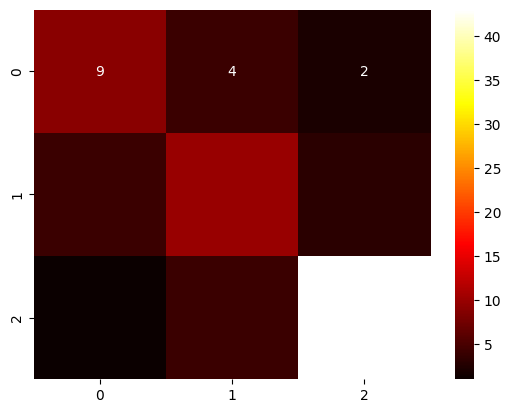

In [113]:
sns.heatmap(data=logreg_cm, cmap="hot", annot=True)

<Axes: xlabel='origin', ylabel='count'>

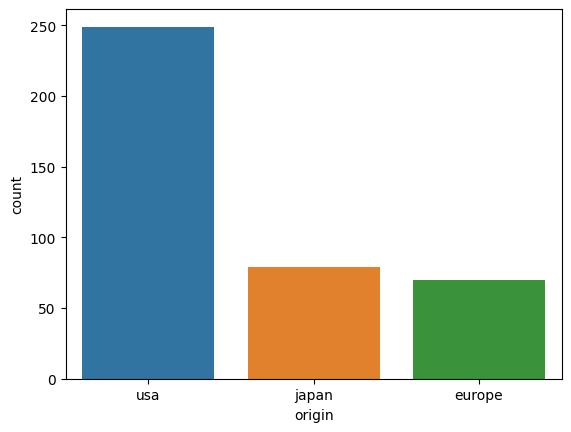

In [114]:
sns.countplot(mpg, x='origin')

In [122]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(train_log_queries, train_log_answers)
dtc.score(test_log_queries, test_log_answers)


0.8625

In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000).fit(train_log_queries, train_log_answers)
rfc.score(test_log_queries, test_log_answers)

0.85

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=15).fit(train_log_queries, train_log_answers)
knc.score(test_log_queries, test_log_answers)

0.7

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(logreg_queries)
scaled_queries = scaler.transform(logreg_queries)
scaled_queries

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.63086987,
        -1.29549834, -1.62742629],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.85433297,
        -1.47703779, -1.62742629],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.55047045,
        -1.65857724, -1.62742629],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -0.79858454,
        -1.4407299 ,  1.62198339],
       [ 0.57460104, -0.85632057, -0.70507731, ..., -0.40841088,
         1.10082237,  1.62198339],
       [ 0.95891297, -0.85632057, -0.71467988, ..., -0.29608816,
         1.39128549,  1.62198339]])

In [145]:
scaled_log_df = pd.DataFrame(scaled_queries, columns=train_log_queries.columns)
scaled_log_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,1.090604,0.674003,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.587138,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.195794,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.195794,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.934899,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.473939,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-0.925936,-1.360985,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.561039,-0.526118,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.705077,-0.656566,-0.408411,1.100822,1.621983


In [152]:
from sklearn.neighbors import KNeighborsClassifier
scaled_train_queries, scaled_test_queries, scaled_train_answers, scaled_test_answers = \
train_test_split(scaled_log_df, logreg_answers, test_size=0.25, random_state=2048)
knc = KNeighborsClassifier(n_neighbors=13).fit(scaled_train_queries, scaled_train_answers)
knc.score(scaled_test_queries, scaled_test_answers)

0.76

In [153]:
def find_optimal(max_neighbours, train_q, train_a, test_q, test_a):
    score_list = []
    for i in range(max_neighbours):
        result = KNeighborsClassifier(n_neighbors = i+1).fit(train_q, train_a)
        score_list.append(result.score(test_q, test_a))
    return score_list

<Axes: >

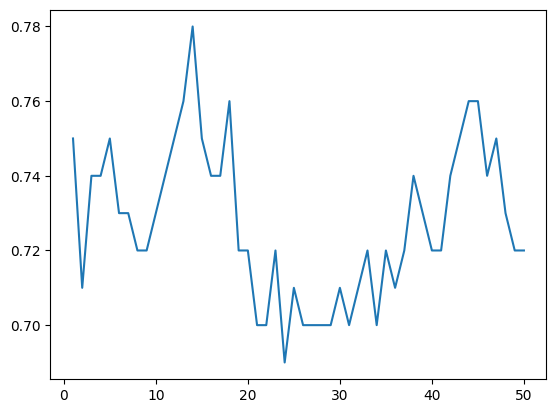

In [156]:
results_knn = pd.Series(
    find_optimal(
        50, 
        scaled_train_queries, 
        scaled_train_answers, 
        scaled_test_queries, 
        scaled_test_answers
    ), 
    index=range(1, 51))
sns.lineplot(results_knn)

In [163]:
results_knn.idxmax()

14